In [1]:
from __future__ import division
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
#from kde import weighted_gaussian_kde
from scipy import stats
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import math
from astropy.io import ascii
##Read in the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
import clustering.clustering.projected_correlation_functions as w
import clustering.clustering.randomsEdited as rand
from clustering.clustering.utils import wp_d1d2,wp_dd

# Plot the Peas-LRG CCF vs LRG ACF

In [4]:
# read in orignal Peas file
t=Table.read('../codes/MainCatalogues/dr12PeastoPortStarforming.fits',format='fits')
peas=np.array(t)

#Add new array field of comoving distances needed for Corrfunc inputs
cdists = np.array([cosmo.comoving_distance(z).value for z in peas['z']])*cosmo.h
peas = append_fields(peas, 'cdist', cdists)

# append the field and make back into normal array
peas=np.array(peas)

Text(0.5, 1.0, 'Cross-Correlation Functions - Peas vs LRG')

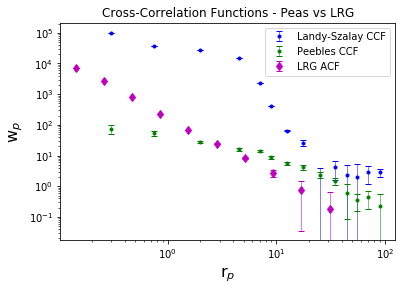

In [5]:
##old one, messed up randomization

rp_LRGjack=np.load('output/CCFResults/rp_LRGjack.npy')
wp_p_LRGjack=np.load('output/CCFResults/wp_p_LRGjack.npy')
wp_p_err_LRGjack=np.load('output/CCFResults/wp_p_err_LRGjack.npy')
cov_LRGjack=np.load('output/CCFResults/cov_LRGjack.npy')

rp_xc_Pjackpi10 = np.load('output/CCFResults/rp_xc_Pjackpi10.npy')
wp_xc_Pjackpi10 = np.load('output/CCFResults/wp_xc_Pjackpi10.npy')
wp_xc_err_Pjackpi10 = np.load('output/CCFResults/wp_xc_err_Pjackpi10.npy')
cov_xc_Pjackpi10 = np.load('output/CCFResults/cov_xc_Pjackpi10.npy')

rp_xc_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi10LS.npy')
wp_xc_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi10LS.npy')
wp_xc_err_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi10LS.npy')
cov_xc_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi10LS.npy')

plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi10LS,wp_xc_Pjackpi10LS,yerr=wp_xc_err_Pjackpi10LS,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
plt.errorbar(rp_xc_Pjackpi10,wp_xc_Pjackpi10,yerr=wp_xc_err_Pjackpi10,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Peebles CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG')

Text(0.5, 1.0, 'Cross-Correlation Functions - Peas vs LRG')

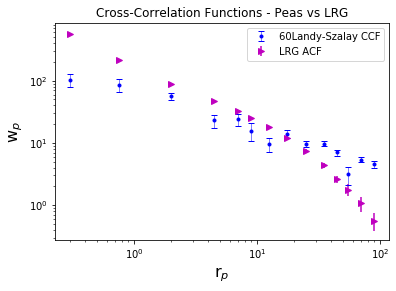

In [16]:
rp_LRGjack=np.load('output/ACFResults/LandySzalay/rp_LRGJackpi60.npy')
wp_p_LRGjack=np.load('output/ACFResults/LandySzalay/wp_LRGJackpi60.npy')
wp_p_err_LRGjack=np.load('output/ACFResults/LandySzalay/wp_err_LRGJackpi60.npy')
cov_LRGjack=np.load('output/ACFResults/LandySzalay/cov_LRGJackpi60.npy')

rp_xc_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi60LS.npy')
wp_xc_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi60LS.npy')
wp_xc_err_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi60LS.npy')
cov_xc_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi60LS.npy')


plt.errorbar(rp_xc_Pjackpi60LS,wp_xc_Pjackpi60LS,yerr=wp_xc_err_Pjackpi60LS,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='60Landy-Szalay CCF')
#plt.errorbar(rp_xc_Pjackpi60,wp_xc_Pjackpi60,yerr=wp_xc_err_Pjackpi60,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='60Peebles CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack,yerr=wp_p_err_LRGjack,fmt='>',color='m',label='LRG ACF')

plt.yscale("log")
plt.xscale("log")
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG')
#plt.savefig('output/PlotsGraphs/LS/peaslrgccf_wPvsrP_pi60.png')

In [17]:
rp_xc_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi10LS.npy')
wp_xc_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi10LS.npy')
wp_xc_err_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi10LS.npy')
cov_xc_Pjackpi10LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi10LS.npy')

rp_xc_Pjackpi20LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi20LS.npy')
wp_xc_Pjackpi20LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi20LS.npy')
wp_xc_err_Pjackpi20LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi20LS.npy')
cov_xc_Pjackpi20LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi20LS.npy')

rp_xc_Pjackpi30LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi30LS.npy')
wp_xc_Pjackpi30LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi30LS.npy')
wp_xc_err_Pjackpi30LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi30LS.npy')
cov_xc_Pjackpi30LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi30LS.npy')

rp_xc_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi40LS.npy')
wp_xc_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi40LS.npy')
wp_xc_err_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi40LS.npy')
cov_xc_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi40LS.npy')

rp_xc_Pjackpi50LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi50LS.npy')
wp_xc_Pjackpi50LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi50LS.npy')
wp_xc_err_Pjackpi50LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi50LS.npy')
cov_xc_Pjackpi50LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi50LS.npy')

rp_xc_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi60LS.npy')
wp_xc_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi60LS.npy')
wp_xc_err_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi60LS.npy')
cov_xc_Pjackpi60LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi60LS.npy')

rp_xc_Pjackpi70LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi70LS.npy')
wp_xc_Pjackpi70LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi70LS.npy')
wp_xc_err_Pjackpi70LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi70LS.npy')
cov_xc_Pjackpi70LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi70LS.npy')

rp_xc_Pjackpi80LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi80LS.npy')
wp_xc_Pjackpi80LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi80LS.npy')
wp_xc_err_Pjackpi80LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi80LS.npy')
cov_xc_Pjackpi80LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi80LS.npy')

rp_xc_Pjackpi90LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi90LS.npy')
wp_xc_Pjackpi90LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi90LS.npy')
wp_xc_err_Pjackpi90LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi90LS.npy')
cov_xc_Pjackpi90LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi90LS.npy')

rp_xc_Pjackpi100LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi100LS.npy')
wp_xc_Pjackpi100LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi100LS.npy')
wp_xc_err_Pjackpi100LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi100LS.npy')
cov_xc_Pjackpi100LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi100LS.npy')

rp_xc_Pjackpi110LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi110LS.npy')
wp_xc_Pjackpi110LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi110LS.npy')
wp_xc_err_Pjackpi110LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi110LS.npy')
cov_xc_Pjackpi110LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi110LS.npy')

Text(0.5, 1.0, 'Cross-Correlation Functions - Peas vs LRG')

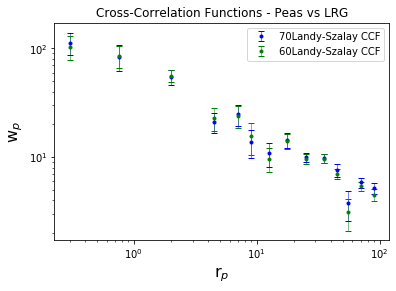

In [19]:
plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi70LS,wp_xc_Pjackpi70LS,yerr=wp_xc_err_Pjackpi70LS,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='70Landy-Szalay CCF')
plt.errorbar(rp_xc_Pjackpi60LS,wp_xc_Pjackpi60LS,yerr=wp_xc_err_Pjackpi60LS,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='60Landy-Szalay CCF')
#plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack/rp_LRGjack,fmt='>', capsize = 3, elinewidth = 0.5,color='m',label='LRG ACF')
#plt.errorbar(rp_xc_Pjackpi10LS,wp_xc_Pjackpi10LS,yerr=wp_xc_err_Pjackpi10LS,fmt='.',color='r', capsize = 3, elinewidth = 0.5, label='10Landy-Szalay CCF')
#plt.errorbar(rp_xc_Pjackpi10,wp_xc_Pjackpi10,yerr=wp_xc_err_Pjackpi10,fmt='.',color='y', capsize = 3, elinewidth = 0.5, label='10Peebles CCF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG')
#plt.savefig('output/PlotsGraphs/LS/peaslrgccf_wPvsrP_pi60, 70.png')

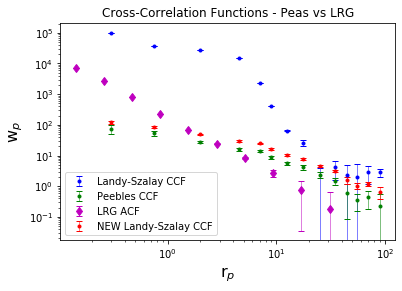

In [12]:
rp_LRGjack=np.load('output/CCFResults/old/rp_LRGjack.npy')
wp_p_LRGjack=np.load('output/CCFResults/old/wp_p_LRGjack.npy')
wp_p_err_LRGjack=np.load('output/CCFResults/old/wp_p_err_LRGjack.npy')
cov_LRGjack=np.load('output/CCFResults/old/cov_LRGjack.npy')

rp_xc_Pjackpi10 = np.load('output/CCFResults/old/rp_xc_Pjackpi10.npy')
wp_xc_Pjackpi10 = np.load('output/CCFResults/old/wp_xc_Pjackpi10.npy')
wp_xc_err_Pjackpi10 = np.load('output/CCFResults/old/wp_xc_err_Pjackpi10.npy')
cov_xc_Pjackpi10 = np.load('output/CCFResults/old/cov_xc_Pjackpi10.npy')

rp_xc_Pjackpi10LS = np.load('output/CCFResults/old/LandySzalay/rp_xc_Pjackpi10LS.npy')
wp_xc_Pjackpi10LS = np.load('output/CCFResults/old/LandySzalay/wp_xc_Pjackpi10LS.npy')
wp_xc_err_Pjackpi10LS = np.load('output/CCFResults/old/LandySzalay/wp_xc_err_Pjackpi10LS.npy')
cov_xc_Pjackpi10LS = np.load('output/CCFResults/old/LandySzalay/cov_xc_Pjackpi10LS.npy')

rp_xc_Pjackpi10LSn = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi10LS.npy')
wp_xc_Pjackpi10LSn = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi10LS.npy')
wp_xc_err_Pjackpi10LSn = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi10LS.npy')
cov_xc_Pjackpi10LSn = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi10LS.npy')

plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi10LS,wp_xc_Pjackpi10LS,yerr=wp_xc_err_Pjackpi10LS,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
plt.errorbar(rp_xc_Pjackpi10,wp_xc_Pjackpi10,yerr=wp_xc_err_Pjackpi10,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Peebles CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
plt.errorbar(rp_xc_Pjackpi10LSn,wp_xc_Pjackpi10LSn,yerr=wp_xc_err_Pjackpi10LSn,fmt='.',color='r', capsize = 3, elinewidth = 0.5, label='NEW Landy-Szalay CCF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG')
plt.savefig('../codes/output/PlotsGraphs/2-10NovNewRandom/CCFCompare_pi10.png')

In [5]:
rp_xc_Pjackpi10 = np.load('output/CCFResults/old/rp_xc_Pjackpi10.npy')
wp_xc_Pjackpi10 = np.load('output/CCFResults/old/wp_xc_Pjackpi10.npy')
wp_xc_err_Pjackpi10 = np.load('output/CCFResults/old/wp_xc_err_Pjackpi10.npy')
cov_xc_Pjackpi10 = np.load('output/CCFResults/old/cov_xc_Pjackpi10.npy')

rp_xc_Pjackpi20 = np.load('output/CCFResults/old/rp_xc_Pjackpi20.npy')
wp_xc_Pjackpi20 = np.load('output/CCFResults/old/wp_xc_Pjackpi20.npy')
wp_xc_err_Pjackpi20 = np.load('output/CCFResults/old/wp_xc_err_Pjackpi20.npy')
cov_xc_Pjackpi20 = np.load('output/CCFResults/old/cov_xc_Pjackpi20.npy')

rp_xc_Pjackpi30 = np.load('output/CCFResults/old/rp_xc_Pjackpi30.npy')
wp_xc_Pjackpi30 = np.load('output/CCFResults/old/wp_xc_Pjackpi30.npy')
wp_xc_err_Pjackpi30 = np.load('output/CCFResults/old/wp_xc_err_Pjackpi30.npy')
cov_xc_Pjackpi30 = np.load('output/CCFResults/old/cov_xc_Pjackpi30.npy')

rp_xc_Pjackpi40 = np.load('output/CCFResults/old/rp_xc_Pjackpi40.npy')
wp_xc_Pjackpi40 = np.load('output/CCFResults/old/wp_xc_Pjackpi40.npy')
wp_xc_err_Pjackpi40 = np.load('output/CCFResults/old/wp_xc_err_Pjackpi40.npy')
cov_xc_Pjackpi40 = np.load('output/CCFResults/old/cov_xc_Pjackpi40.npy')



In [22]:
cov_xc_Pjackpi40.shape

(14, 14)

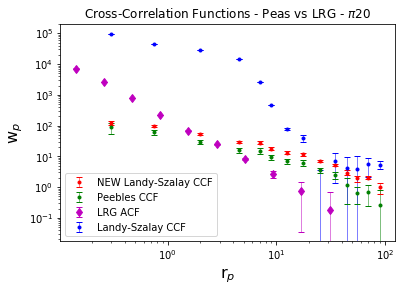

In [24]:
rp_xc_Pjackpi20LSo = np.load('output/CCFResults/old/LandySzalay/rp_xc_Pjackpi20LS.npy')
wp_xc_Pjackpi20LSo = np.load('output/CCFResults/old/LandySzalay/wp_xc_Pjackpi20LS.npy')
wp_xc_err_Pjackpi20LSo = np.load('output/CCFResults/old/LandySzalay/wp_xc_err_Pjackpi20LS.npy')
cov_xc_Pjackpi20LSo = np.load('output/CCFResults/old/LandySzalay/cov_xc_Pjackpi20LS.npy')

plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi20LS,wp_xc_Pjackpi20LS,yerr=wp_xc_err_Pjackpi20LS,fmt='.',color='r', capsize = 3, elinewidth = 0.5, label='NEW Landy-Szalay CCF')
plt.errorbar(rp_xc_Pjackpi20,wp_xc_Pjackpi20,yerr=wp_xc_err_Pjackpi20,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Peebles CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
plt.errorbar(rp_xc_Pjackpi20LSo,wp_xc_Pjackpi20LSo,yerr=wp_xc_err_Pjackpi20LSo,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')

plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG - $\pi20$')
plt.savefig('../codes/output/PlotsGraphs/2-10NovNewRandom/CCFCompare_pi20.png')

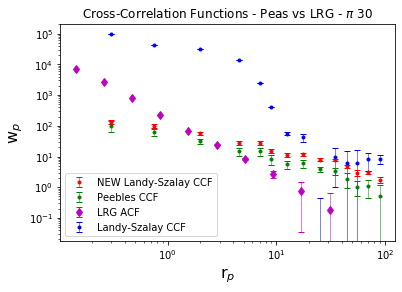

In [25]:
rp_xc_Pjackpi30LSo = np.load('output/CCFResults/old/LandySzalay/rp_xc_Pjackpi30LS.npy')
wp_xc_Pjackpi30LSo = np.load('output/CCFResults/old/LandySzalay/wp_xc_Pjackpi30LS.npy')
wp_xc_err_Pjackpi30LSo = np.load('output/CCFResults/old/LandySzalay/wp_xc_err_Pjackpi30LS.npy')
cov_xc_Pjackpi30LSo = np.load('output/CCFResults/old/LandySzalay/cov_xc_Pjackpi30LS.npy')

plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi30LS,wp_xc_Pjackpi30LS,yerr=wp_xc_err_Pjackpi30LS,fmt='.',color='r', capsize = 3, elinewidth = 0.5, label='NEW Landy-Szalay CCF')
plt.errorbar(rp_xc_Pjackpi30,wp_xc_Pjackpi30,yerr=wp_xc_err_Pjackpi30,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Peebles CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
plt.errorbar(rp_xc_Pjackpi30LSo,wp_xc_Pjackpi30LSo,yerr=wp_xc_err_Pjackpi30LSo,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG - $\pi$ 30')
plt.savefig('../codes/output/PlotsGraphs/2-10NovNewRandom/CCFCompare_pi30.png')

Text(0.5, 1.0, 'Cross-Correlation Functions - Peas vs LRG - $\\pi$ 40')

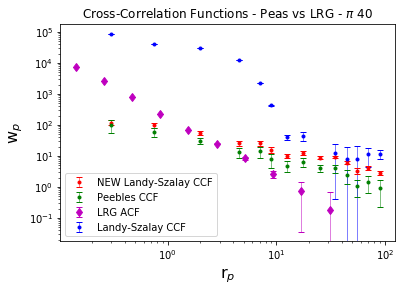

In [11]:
rp_xc_Pjackpi40LSo = np.load('output/CCFResults/old/LandySzalay/rp_xc_Pjackpi40LS.npy')
wp_xc_Pjackpi40LSo = np.load('output/CCFResults/old/LandySzalay/wp_xc_Pjackpi40LS.npy')
wp_xc_err_Pjackpi40LSo = np.load('output/CCFResults/old/LandySzalay/wp_xc_err_Pjackpi40LS.npy')
cov_xc_Pjackpi40LSo = np.load('output/CCFResults/old/LandySzalay/cov_xc_Pjackpi40LS.npy')

plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi40LS,wp_xc_Pjackpi40LS,yerr=wp_xc_err_Pjackpi40LS,fmt='.',color='r', capsize = 3, elinewidth = 0.5, label='NEW Landy-Szalay CCF')
plt.errorbar(rp_xc_Pjackpi40,wp_xc_Pjackpi40,yerr=wp_xc_err_Pjackpi40,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Peebles CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
plt.errorbar(rp_xc_Pjackpi40LSo,wp_xc_Pjackpi40LSo,yerr=wp_xc_err_Pjackpi40LSo,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG - $\pi$ 40')
#plt.savefig('../codes/output/PlotsGraphs/2-10NovNewRandom/CCFCompare_pi40.png')

In [12]:
wp_xc_err_Pjackpi40LSo

array([ 55.7459639 , 119.30524308,  44.39534904,  38.87546225,
        32.94240123,   9.41445901,   7.60204927,  15.41573197,
        14.6144946 ,  11.62468413,  11.25508082,  13.31513178,
         6.58519719,   3.512754  ])

35.0


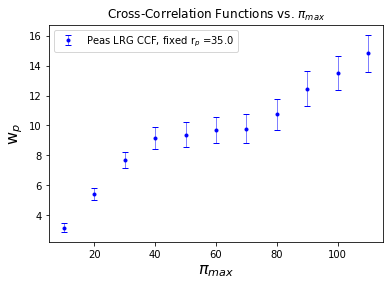

In [53]:
#n is the fixed r_p index
n = 9
r_p = rp_xc_Pjackpi20LS[n]
print(r_p)
#x-axis
pimaxArr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
#y-axis
rp_n_Wp = np.array([wp_xc_Pjackpi10LS[n], wp_xc_Pjackpi20LS[n], wp_xc_Pjackpi30LS[n], wp_xc_Pjackpi40LS[n], wp_xc_Pjackpi50LS[n], wp_xc_Pjackpi60LS[n], wp_xc_Pjackpi70LS[n], wp_xc_Pjackpi80LS[n], wp_xc_Pjackpi90LS[n], wp_xc_Pjackpi100LS[n], wp_xc_Pjackpi110LS[n] ])
#y-axis-err
rp_n_Wp_err = np.array([wp_xc_err_Pjackpi10LS[n], wp_xc_err_Pjackpi20LS[n], wp_xc_err_Pjackpi30LS[n], wp_xc_err_Pjackpi40LS[n], wp_xc_err_Pjackpi50LS[n], wp_xc_err_Pjackpi60LS[n], wp_xc_err_Pjackpi70LS[n], wp_xc_err_Pjackpi80LS[n], wp_xc_err_Pjackpi90LS[n], wp_xc_err_Pjackpi100LS[n], wp_xc_err_Pjackpi110LS[n] ])
#plt.yscale("log")
#plt.xscale("log")
plt.errorbar(pimaxArr,rp_n_Wp,yerr=rp_n_Wp_err,fmt='.',color='b', capsize = 3, elinewidth = 0.5,  label='Peas LRG CCF, fixed r$_p$ ='+ str(r_p))
#plt.errorbar(label='r$_p$ = ' + str(r_p))
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('$\pi_{max}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions vs. $\pi_{max}$')
#plt.savefig('../codes/output/PlotsGraphs/3-11Nov-Pimax,ACFPeas/peas_wp_pimax_fixedrp_' + str(r_p) + '.png')

In [14]:
rp_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/rp_peaJackpi60.npy')
wp_p_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/wp_LRGJackpi60.npy')
wp_p_err_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/wp_err_LRGJackpi60.npy')
cov_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/cov_LRGJackpi60.npy')

rp_xc_Pjackpi60LS = np.load('../codes/output/CCFResults/LandySzalay/rp_xc_Pjackpi60LS.npy')
wp_xc_Pjackpi60LS = np.load('../codes/output/CCFResults/LandySzalay/wp_xc_Pjackpi60LS.npy')
wp_xc_err_Pjackpi60LS = np.load('../codes/output/CCFResults/LandySzalay/wp_xc_err_Pjackpi60LS.npy')
cov_xc_Pjackpi60LS = np.load('../codes/output/CCFResults/LandySzalay/cov_xc_Pjackpi60LS.npy')

rp_xc_acf60 = np.load('../codes/output/ACFResults/LandySzalay/rp_peaJackpi60.npy')
wp_xc_acf60 = np.load('../codes/output/ACFResults/LandySzalay/wp_peaJackpi60.npy')
wp_xc_err_acf60 = np.load('../codes/output/ACFResults/LandySzalay/wp_err_peaJackpi60S.npy')
cov_xc_acf60 = np.load('../codes/output/ACFResults/LandySzalay/cov_peaJackpi60.npy')

plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi60LS,wp_xc_Pjackpi60LS,yerr=wp_xc_err_Pjackpi60LS,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
plt.errorbar(rp_xc_acf60,wp_xc_acf60,yerr=wp_xc_err_acf60,fmt='.',color='r', capsize = 3, elinewidth = 0.5, label='Peas ACF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('Cross-Correlation Functions - Peas vs LRG')
plt.savefig('../codes/output/PlotsGraphs/2-10NovNewRandom/CCFCompare_pi10.png')

FileNotFoundError: [Errno 2] No such file or directory: '../codes/output/ACFResults/LandySzalay/wp_peaLRGJackpi60.npy'

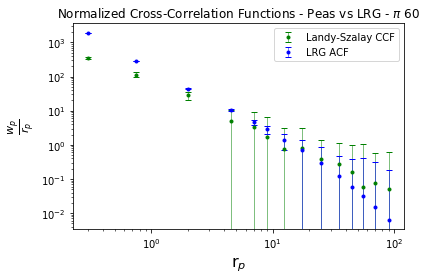

In [43]:
rp_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/rp_peaJackpi60.npy')
wp_p_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/wp_LRGJackpi60.npy')
wp_p_err_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/wp_err_LRGJackpi60.npy')
cov_LRGjack=np.load('../codes/output/ACFResults/LandySzalay/cov_LRGJackpi60.npy')

rp_xc_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/rp_xc_Pjackpi60LS.npy')
wp_xc_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/wp_xc_Pjackpi60LS.npy')
wp_xc_err_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/wp_xc_err_Pjackpi60LS.npy')
cov_xc_Pjackpi40LS = np.load('output/CCFResults/LandySzalay/cov_xc_Pjackpi60LS.npy')


plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi40LS,wp_xc_Pjackpi40LS/rp_xc_Pjackpi40LS,yerr=wp_xc_err_Pjackpi40LS,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='.',color='b', capsize = 3, elinewidth = 0.5,label='LRG ACF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel(r'$\frac{w_{p}}{r_p}$',fontsize=16)
#plt.ylabel('w$_p$/ r$_p$',fontsize=16)
plt.title('Normalized Cross-Correlation Functions - Peas vs LRG - $\pi$ 60')
plt.tight_layout()
plt.savefig('../codes/output/PlotsGraphs/4-10Dec,NormalizedPea/PeaNormalizedCCFvsLRG.png')

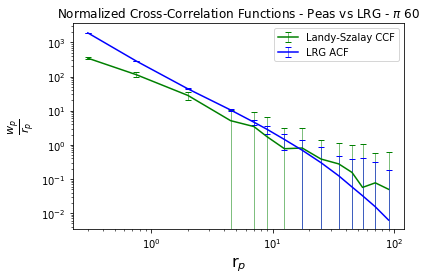

In [44]:
plt.tight_layout()
plt.yscale("log")
plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi40LS,wp_xc_Pjackpi40LS/rp_xc_Pjackpi40LS,yerr=wp_xc_err_Pjackpi40LS,fmt='g',color='g', capsize = 3, elinewidth = 0.5, label='Landy-Szalay CCF')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='b',color='b', capsize = 3, elinewidth = 0.5,label='LRG ACF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel(r'$\frac{w_{p}}{r_p}$',fontsize=16)
#plt.ylabel('w$_p$/ r$_p$',fontsize=16)
plt.title('Normalized Cross-Correlation Functions - Peas vs LRG - $\pi$ 60')
plt.tight_layout()
plt.savefig('../codes/output/PlotsGraphs/4-10Dec,NormalizedPea/PeaNormalizedCCFvsLRGLine.png')